In [1]:
#import the Libraries 
import os 
os.chdir('C:\\Users\\User\\Documents\\PYTHON\\Works\\Fashion')
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
customers = pd.read_csv("FashionCustomerData.csv")

#To view the customers details 

In [2]:
pp.ProfileReport(customers)

In [6]:
profile = pp.ProfileReport(customers)

In [7]:
#saving the profile 
profile.to_file(output_file="fashion.html")

# Exploratory Data Analysis (EDA)

 #Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns

In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

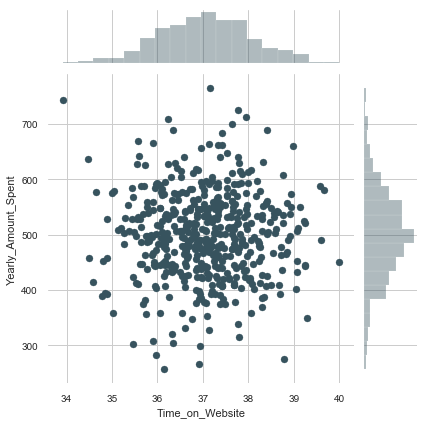

In [9]:
# More time on site, more money spent.
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=customers)

In [10]:
#Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns

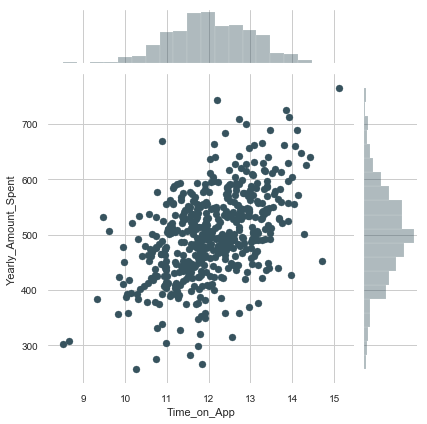

In [11]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=customers)
# This one looks stronger correlation than Time_on_Website

In [12]:
#use pairplot to view the correlation 

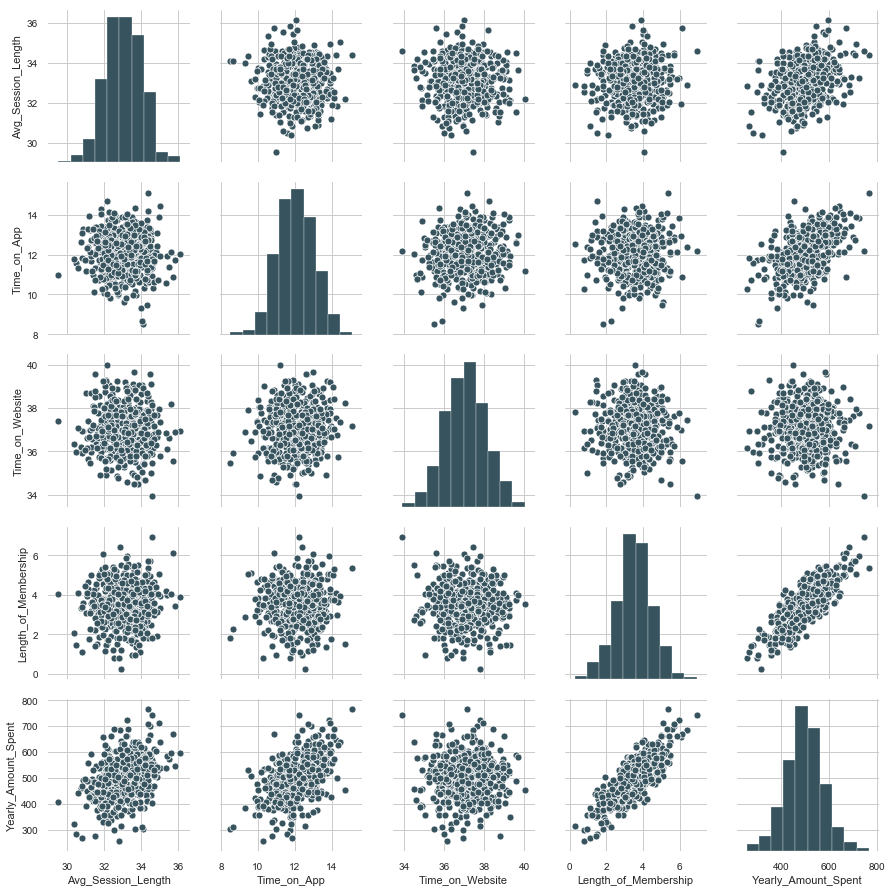

In [13]:
sns.pairplot(customers)

In [14]:
# Length of Membership with strong correlation

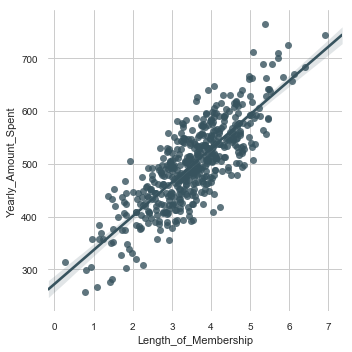

In [15]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly_Amount_Spent" column. **

In [16]:
y = customers['Yearly_Amount_Spent']

In [17]:
X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=85. test_size=0.3 means 30% of records are used for testing the model**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

#Import LinearRegression from scikit learn

In [20]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model  

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.08163249 39.18778762  0.40460005 61.41777824]


**Predicting Test Data

In [23]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values.
Ideally for each point value and x and y axis should be same**

Text(0, 0.5, 'Predicted Y')

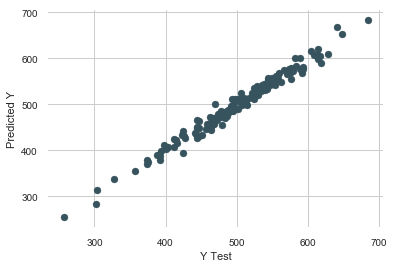

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Evaluating the Model the performance using Root Mean Squared Error

In [25]:
# calculate these metrics by hand!
from sklearn import metrics

print('RMSE:', round( np.sqrt(metrics.mean_squared_error(y_test, predictions)),2) )

RMSE: 10.57


**Plot a histogram of the residuals and make sure it looks normally distributed**

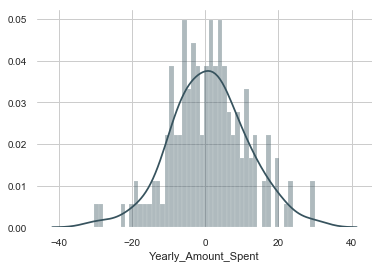

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


**Interpreting the coefficients:

**Avg. Session Length will increase of 26.08 total dollars spent.
**Time on App will increase of 39.18 total dollars spent
**Time on Website will increase of 0.40 total dollars spent
**Length of Membership will increase of 61.41 total dollars spent
